In [4]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

import os
from PIL import Image

# Find a image in a GIF file

The concept of this program is that given a GIF picture find the picture that stand still.

1) frist we are going to extract the GIF file into frames of PNG pictures.


2) go through each frame and looking for the pixel that does not change, and give that pixel a score.

3) (have not implemented yet) trying to normalize the noise pixel, which I already try but still have some

#### the code I wrote here is to make the life of the user easier when they want to use this program

In [5]:
#exract gif to png
def extractFrames(inGif, outFolder):
    
    if not os.path.exists(outFolder):
        os.makedirs(outFolder)
        
    frame = Image.open(inGif)
    nframes = 0
    while frame:
        frame.save( '%s/%s-%s.png' % (outFolder, os.path.basename(inGif), nframes ) , 'PNG')
        nframes += 1
        try:
            frame.seek( nframes )
        except EOFError:
            break;
            
def loadimage(dirname):
    frames = []
    for filename in os.listdir('./%s'%dirname):
        if filename.endswith(".png"):
            frames.append(plt.imread('./%s/%s'%(dirname,filename)))
    return frames

def getframes(pic_name):
    dirname = pic_name[:pic_name.index('.gif')]+"Frames"
    extractFrames(pic_name,dirname)
    frames = loadimage(dirname)
    print("done")
    return frames

## load the GIF file here

In [6]:
#load .gif image and extract to frame
pic_name = 'hardone.gif' 
frames1 = getframes(pic_name)

done


# Here is the functions that does trying to find the image

In [8]:
def isbackground(pix): #check that pixel is a back ground or not
    return pix[0] == 1. and pix[1] == 1. and pix[2] == 1.

def eva(prev, cur, score): #give a score frame 
    n = prev.shape[0]
    m = prev.shape[1]
    for i in range(n):
        for j in range(m):
            
            if (prev[i][j] == cur[i][j]).all():
                pix = prev[i][j]
                if not (isbackground(pix)):
                    score[i][j] += np.array([20,20,20,10])
    return score


def getOriginal(frames): #Run the whole program
    score = np.zeros(frames[0].shape)
    for i in range(len(frames)):
        if i == 0:
            prev = frames[i]
        else:
            cur = frames[i]
            score = eva(prev, cur, score)
            print("done with frame ", i)
            prev = cur
    return score

In [9]:
ori_maybe = getOriginal(frames1)

done with frame  1
done with frame  2
done with frame  3
done with frame  4
done with frame  5
done with frame  6
done with frame  7
done with frame  8
done with frame  9
done with frame  10
done with frame  11


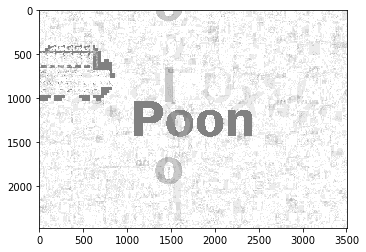

In [10]:
plt.imshow(ori_maybe)

In [14]:
pic_name = 'basic.gif' 
frames2 = getframes(pic_name)

done


In [15]:
fram2score = getOriginal(frames2)

done with frame  1
done with frame  2
done with frame  3
done with frame  4
done with frame  5
done with frame  6
done with frame  7
done with frame  8
done with frame  9
done with frame  10


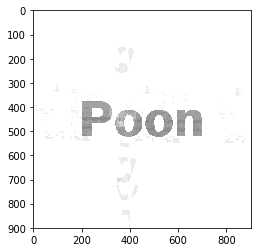

In [16]:
plt.imshow(fram2score)